In [1]:
import scipy.io as sio
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

Using TensorFlow backend.


In [2]:
#loading data
DDataFile = './D_VLOS_scaled_mean_mean_alpha6_fft_abs_Frobenius_sphericalWave_B32_U20000.mat'
DData = sio.loadmat(DDataFile)

LocationDataFile = './randLocationU20000VIP.mat'
locationData = sio.loadmat(LocationDataFile)


In [3]:
#preprocessing the data
D_data = DData['D']
location_data = locationData['location']
location_data = location_data[:2,:]

l, total = D_data.shape
d, total = location_data.shape

train_length = int(np.floor(total * 0.8))

impulses_train = np.transpose(D_data[:, :train_length])
location_train = np.transpose(location_data[:,:train_length])

impulses_test = np.transpose(D_data[:, train_length:])
location_test = np.transpose(location_data[:,train_length:])

In [9]:
#Build the model
model = keras.Sequential()

# keras.layers.normalization.BatchNormalization()#epsilon=1e-06, mode=0, momentum=0.9, weights=None)
# #model.add(Dropout(0.2)) # best 0.2
# keras.layers.Conv2D(1024, 3)  #, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
# keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)

# keras.layers.normalization.BatchNormalization()#epsilon=1e-06, mode=0, momentum=0.9, weights=None)
# model.add(Dropout(0.2)) # best 0.2
# keras.layers.Conv2D(2048, 3)  #, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
# keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)

#keras.layers.normalization.BatchNormalization()
#model.add(Dropout(0.25)) # best 0.2
model.add(Dense(1024, activation = 'relu'))  #tanh(343,1794)   relu (680,1600)   #the hidden layer number 

#keras.layers.normalization.BatchNormalization()
#model.add(Dropout(0.25)) # best 0.2
model.add(Dense(1024, activation = 'relu'))  #tanh(343,1794)   relu (680,1600)   #the hidden layer number 

model.add(Dense(d, activation = 'linear'))  # None is different from 'linear'      ### the output layer

In [10]:
#Compilation
loss_func = 'mean_squared_error'   #   categorical_crossentropy(bad)   mean_squared_error
opt_func = keras.optimizers.Adam(lr=0.0001) #'Adam'  lr=0.2  #  RMSprop(overfiiting) sgd(overfitting)  Adadelta(overfitting)   Adam

model.compile(loss = loss_func, 
              optimizer = opt_func
             #metrics = ['mse']
             )

#best set: categorical_crossentropy  and sgd, but the loss and acc do not change....

In [11]:
#Train the model, iterating
early_stop = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.1)
history = model.fit(impulses_train, location_train,
                    batch_size = 50, # 10,20
                    epochs = 200,
                    verbose = 2,
                   # callbacks=[early_stop], 
                    validation_split = 0.2 #0.2
                    #validation_data=(impulses_test, location_test)
                   )


Train on 12800 samples, validate on 3200 samples
Epoch 1/200
 - 7s - loss: 76890.4179 - val_loss: 45300.2332
Epoch 2/200
 - 8s - loss: 37102.8034 - val_loss: 22465.8201
Epoch 3/200
 - 9s - loss: 12221.3224 - val_loss: 8767.0954
Epoch 4/200
 - 9s - loss: 8104.6652 - val_loss: 7615.2354
Epoch 5/200
 - 9s - loss: 7184.1006 - val_loss: 6884.6479
Epoch 6/200
 - 9s - loss: 6460.6753 - val_loss: 6214.7881
Epoch 7/200
 - 9s - loss: 5826.2336 - val_loss: 5623.5458
Epoch 8/200
 - 9s - loss: 5253.6473 - val_loss: 5078.3075
Epoch 9/200
 - 9s - loss: 4724.2249 - val_loss: 4573.1592
Epoch 10/200
 - 9s - loss: 4226.1854 - val_loss: 4073.0353
Epoch 11/200
 - 9s - loss: 3776.7962 - val_loss: 3664.4334
Epoch 12/200
 - 9s - loss: 3399.7385 - val_loss: 3318.0465
Epoch 13/200
 - 9s - loss: 3084.2026 - val_loss: 3029.6908
Epoch 14/200
 - 10s - loss: 2838.4075 - val_loss: 2813.2620
Epoch 15/200
 - 10s - loss: 2650.2007 - val_loss: 2636.9130
Epoch 16/200
 - 10s - loss: 2504.9542 - val_loss: 2514.7289
Epoch 17

Epoch 138/200
 - 13s - loss: 896.7661 - val_loss: 1100.0949
Epoch 139/200
 - 12s - loss: 886.3926 - val_loss: 1100.1712
Epoch 140/200
 - 13s - loss: 882.7285 - val_loss: 1099.7581
Epoch 141/200
 - 13s - loss: 879.6131 - val_loss: 1073.1113
Epoch 142/200
 - 13s - loss: 871.4855 - val_loss: 1086.4191
Epoch 143/200
 - 13s - loss: 873.0632 - val_loss: 1076.1030
Epoch 144/200
 - 13s - loss: 863.3011 - val_loss: 1057.4825
Epoch 145/200
 - 13s - loss: 864.8905 - val_loss: 1060.3941
Epoch 146/200
 - 13s - loss: 855.7517 - val_loss: 1041.8125
Epoch 147/200
 - 13s - loss: 851.8145 - val_loss: 1056.6271
Epoch 148/200
 - 13s - loss: 841.1287 - val_loss: 1038.1905
Epoch 149/200
 - 13s - loss: 839.7978 - val_loss: 1034.7446
Epoch 150/200
 - 13s - loss: 829.6789 - val_loss: 1033.9994
Epoch 151/200
 - 13s - loss: 824.6231 - val_loss: 1024.5633
Epoch 152/200
 - 13s - loss: 821.1284 - val_loss: 1024.8891
Epoch 153/200
 - 13s - loss: 817.9809 - val_loss: 1007.7035
Epoch 154/200
 - 13s - loss: 809.4972 - 

In [12]:
#make prediction
loc_prediction = model.predict(impulses_test)
print(loc_prediction.shape)
print(location_test.shape)

(4000, 2)
(4000, 2)


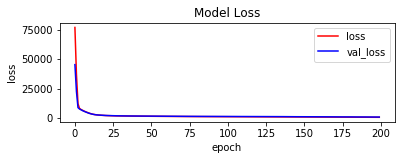

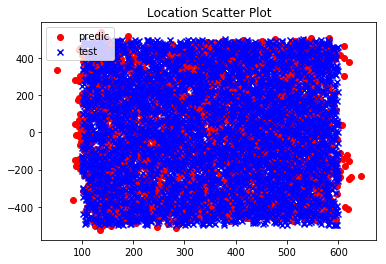

In [14]:
#plot the loss data
plt.subplot(211)
plt.plot(history.history['loss'],'r',label = 'loss')
plt.plot(history.history['val_loss'],'b', label = 'val_loss')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

# plt.subplot(212)
# plt.plot(history.history['mean_absolute_error'],'r',label = 'mean_absolute_error')
# plt.plot(history.history['val_mean_absolute_error'],'b', label = 'val_mean_absolute_error')
# plt.title('Model Loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('Location Scatter Plot')
ax1.scatter(loc_prediction[:,0],loc_prediction[:,1],c = 'r',marker = 'o', label = 'predic')
ax1.scatter(location_test[:,0],location_test[:,1],c = 'b',marker = 'x', label = 'test')
plt.legend()
plt.show()

In [15]:
#The training result
loss = model.evaluate(impulses_test, location_test, verbose=1)
print ('Test loss & mean_absolute_error: ', loss)

4000/4000 [==============================] - 0s 109us/step
Test loss & mean_absolute_error:  754.8413059082031


error distance is  30.961487828916194
max error distance is  225.7241177430823
min error distance is  0.18532384362872428


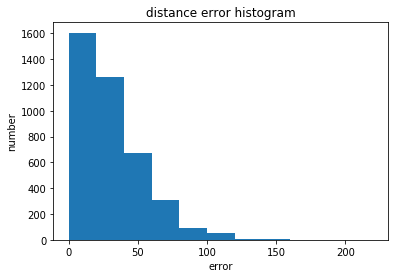

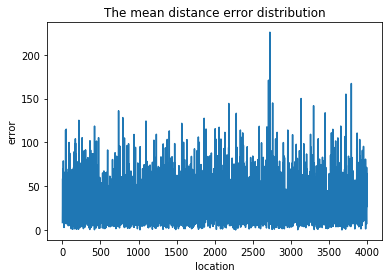

In [20]:
#calculate the mean of error distance
err = loc_prediction - location_test
x = err[:,:1]
y = err[:,1:]

err_abs = np.abs(err)
err_dis = np.sqrt(np.square(x)+np.square(y))
err_min = np.min(err_dis)
err_max = np.max(err_dis)
err_avg = np.mean(err_dis)
print("error distance is ", err_avg)
print("max error distance is ", err_max)
print("min error distance is ", err_min)
#set the value of x, y, z
x,y,z = location_test[:,:1],location_test[:,1:2],err_dis

#plot the 2D image of error
plt.figure(1)
#plt.subplot(2,1,2)
plt.hist(err_dis, bins =  range(0,230,20)) 
plt.xlabel("error")
plt.ylabel("number")
plt.title("distance error histogram") 

plt.figure(2)
#plt.subplot(2,1,1)
plt.plot(err_dis)
plt.title("The mean distance error distribution")
plt.xlabel("location")
plt.ylabel("error")
plt.show()


Text(0.5, 0.92, 'The mean distance error of 3D Iamge')

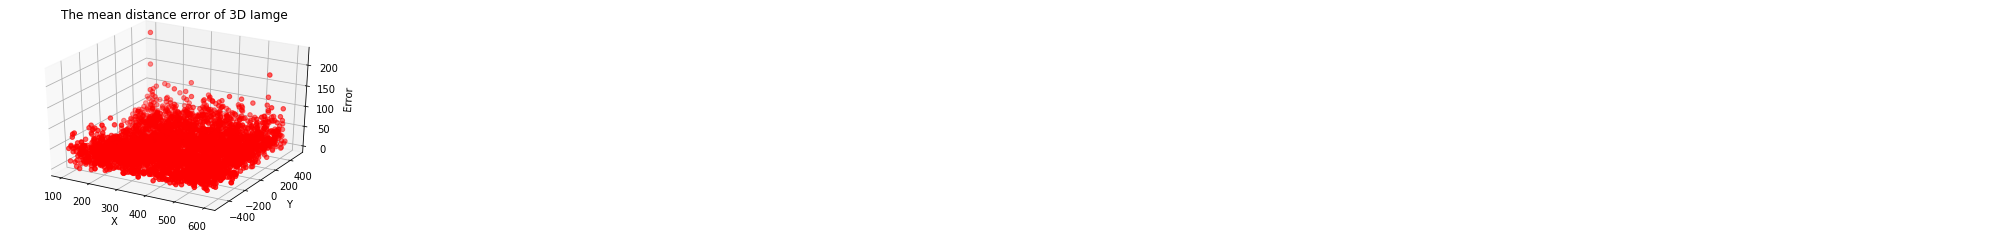

In [21]:
#plot 3D image
ax = plt.subplot(111,projection='3d')
ax.scatter(x,y,z,c='r')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Error")
plt.title("The mean distance error of 3D Iamge")

Text(0.5, 1.0, "The mean distance error of 'heat map'")

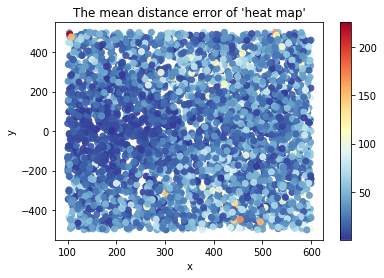

In [22]:
#draw the "heatmap" of error
fig = plt.figure()
ax3 = fig.add_subplot(111)
cm = plt.cm.get_cmap('RdYlBu_r') #Accent  RdYlBu_r RdYlBu  Blues_r  Greens  YlOrBr_r

sc = ax3.scatter(x,y,c = z, marker = 'o', label = 'test',alpha=0.9, cmap=cm)
plt.colorbar(sc)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
plt.title("The mean distance error of 'heat map'")